In [1]:
# Comparing catalogues

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
Head = pd.read_csv('HeadCraters.csv', header=0, names=['Lon','Lat','D_km'])
LROC = pd.read_csv('LROCCraters.csv',header=0,names=['nul','nul2','D_km','Lon','Lat','tag'])[['Lon','Lat','D_km']]
Robbins = pd.read_csv('RobbinsLunarCraters.csv', header=0, names=['nul','Lat','Lon','D_km'])[['Lon','Lat','D_km']]

In [3]:
Head.describe(percentiles=[.5]).round(1)

,Lon,Lat,D_km
count,5185.0,5185.0,5185.0
mean,4.1,-2.3,49.0
std,112.8,42.3,58.2
min,-179.9,-89.7,20.0
50%,16.5,-4.5,35.6
max,180.0,89.3,2050.0


In [4]:
LROC.describe(percentiles=[.5]).round(1)

,Lon,Lat,D_km
count,19335.0,19335.0,19335.0
mean,-3.8,0.7,9.3
std,121.0,33.5,3.7
min,-180.0,-60.0,5.0
50%,7.3,2.6,8.2
max,180.0,60.0,20.0


In [5]:
Robbins.describe(percentiles=[.5]).round(1)

,Lon,Lat,D_km
count,2018630.0,2018630.0,2018630.0
mean,6.9,1.1,1.8
std,102.7,43.2,4.5
min,-180.0,-89.9,0.0
50%,15.3,1.7,1.2
max,180.0,90.0,2491.9


In [104]:
Robbins_head_sz = Robbins[(Robbins['D_km']>=Head['D_km'].min())]# & (Robbins['D_km']<=Head['D_km'].max())]
print('Number of added craters in the relevant range of the Head catalog: {}, which is {:.3}%'.format(len(Robbins_head_sz)-len(Head),(len(Robbins_head_sz)/len(Head)-1)*100))

Number of added craters in the relevant range of the Head catalog: 1786, which is 34.4%


In [60]:
Robbins_LROC_sz = Robbins[(Robbins['D_km']>=LROC['D_km'].min()) & (Robbins['D_km']<=LROC['D_km'].max()) & (Robbins['Lat']>=LROC['Lat'].min()) & (Robbins['Lat']<=LROC['Lat'].max())]
print('Number of added craters in the relevant range of the LROC catalog: {}, which is {:.4}%'.format(len(Robbins_LROC_sz)-len(LROC),(len(Robbins_LROC_sz)/len(LROC)-1)*100))

Number of added craters in the relevant range of the LROC catalog: 44736, which is 231.4%


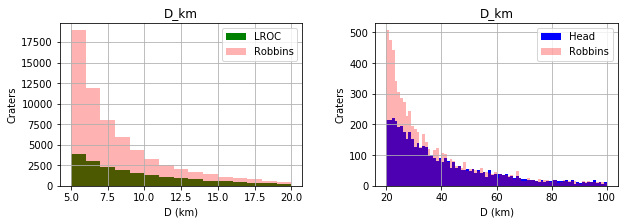

In [151]:
plt.clf()
fig = plt.figure(figsize=(10,3))
ax1 = plt.subplot(121)
LROC.hist('D_km', cumulative=False, alpha=1, bins=15, color='g', ax=ax1, range=(5,20), label='LROC')
Robbins_LROC_sz.hist('D_km', cumulative=False, alpha=0.3, bins=15, color='r', ax=ax1, range=(5,20), label='Robbins')
ax2 = plt.subplot(122)
Head.hist('D_km', cumulative=False, alpha=1, bins=80, color='b', ax=ax2, range=(20,100), label='Head')
Robbins_head_sz.hist('D_km', cumulative=False, alpha=0.3, bins=80, color='r', ax=ax2, range=(20,100), label='Robbins')
ax1.set_xlabel('D (km)')
ax1.set_ylabel('Craters')
ax2.set_xlabel('D (km)')
ax2.set_ylabel('Craters');
ax1.legend();
ax2.legend();
plt.show()

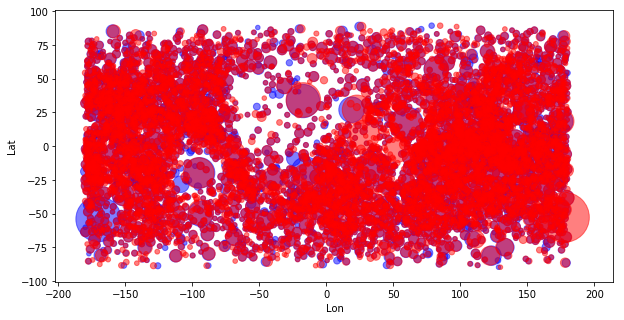

In [199]:
fig,ax = plt.subplots(figsize=(10,5))
Head.plot.scatter(x='Lon',y='Lat', s=Head.D_km, ax=ax, c='b', alpha=0.5, marker='o')
Robbins_head_sz.plot.scatter(x='Lon',y='Lat', s=Robbins_head_sz.D_km, ax=ax, c='r', alpha=0.5, marker='o')
plt.show() 